In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

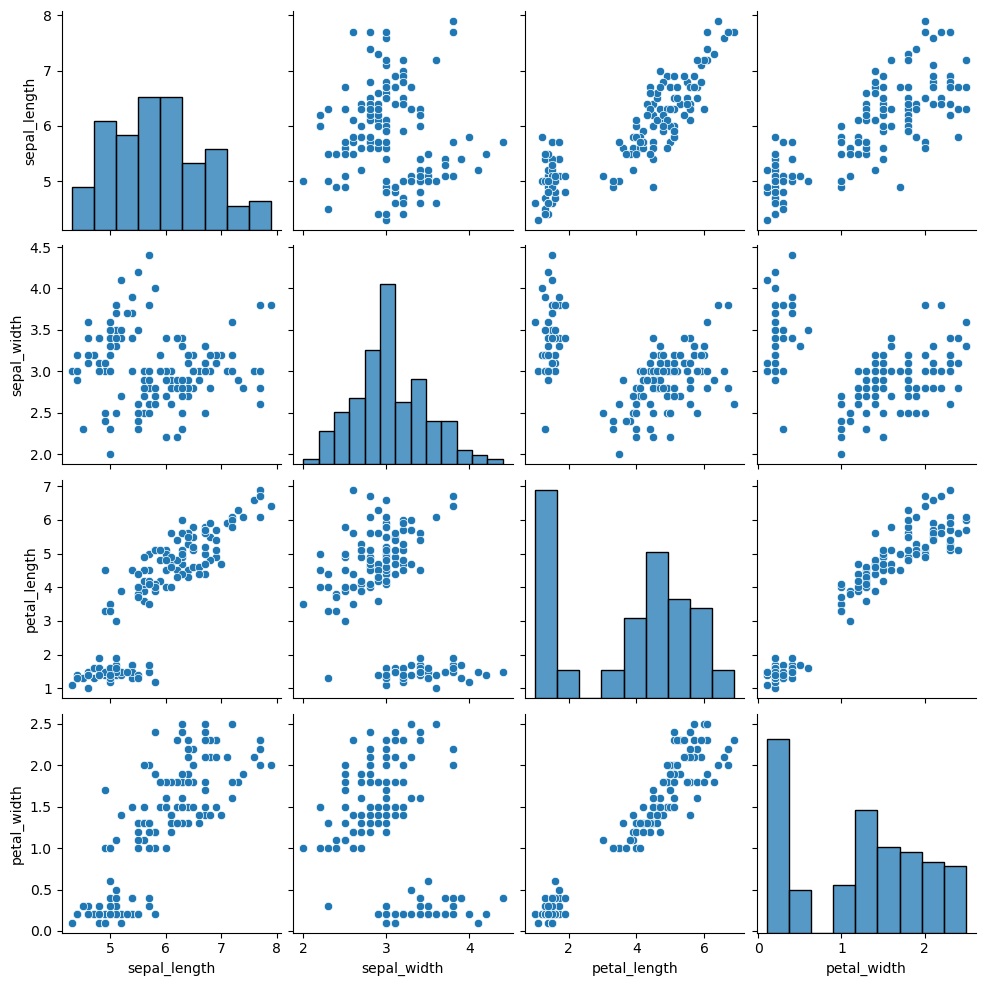

In [9]:
sns.pairplot(df)

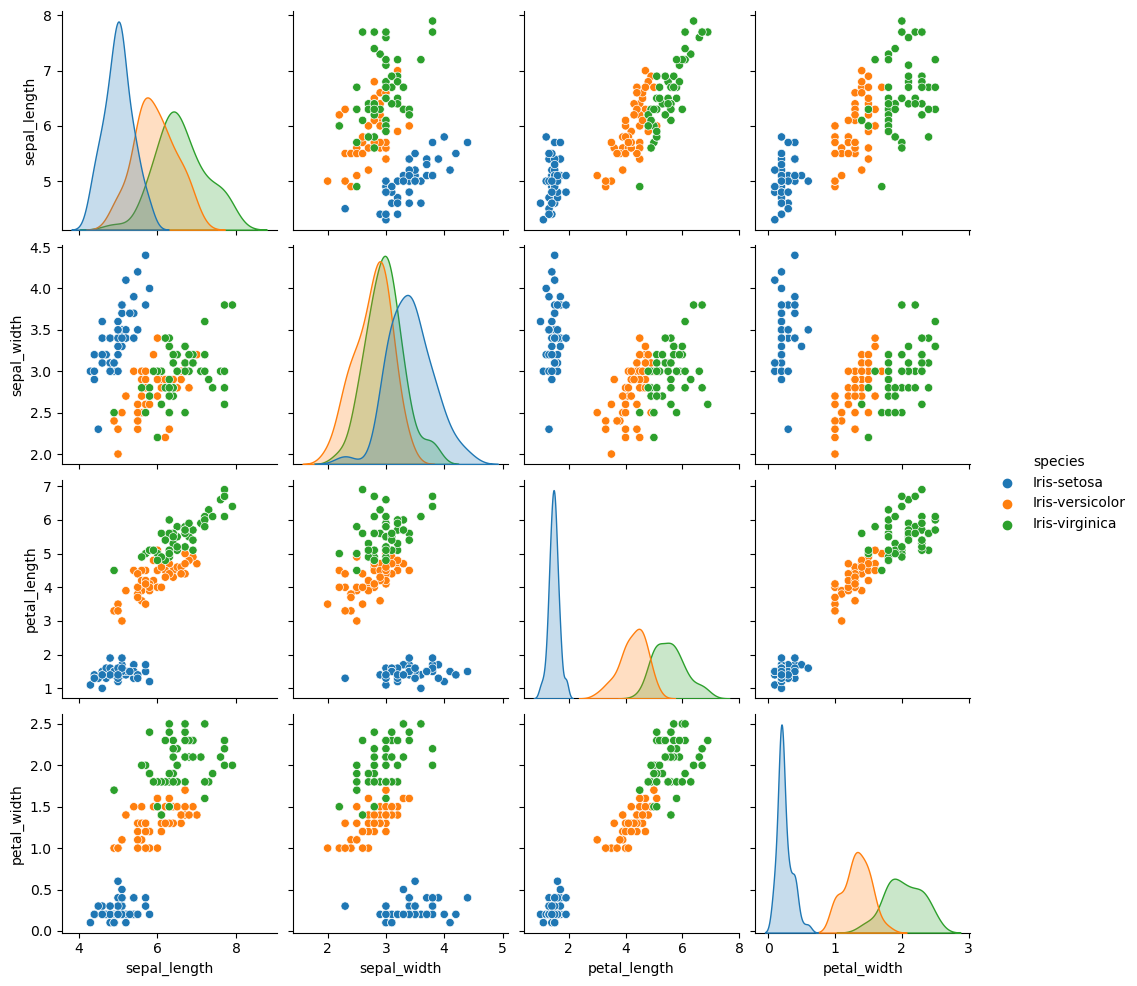

In [11]:
sns.pairplot(df, hue='species')

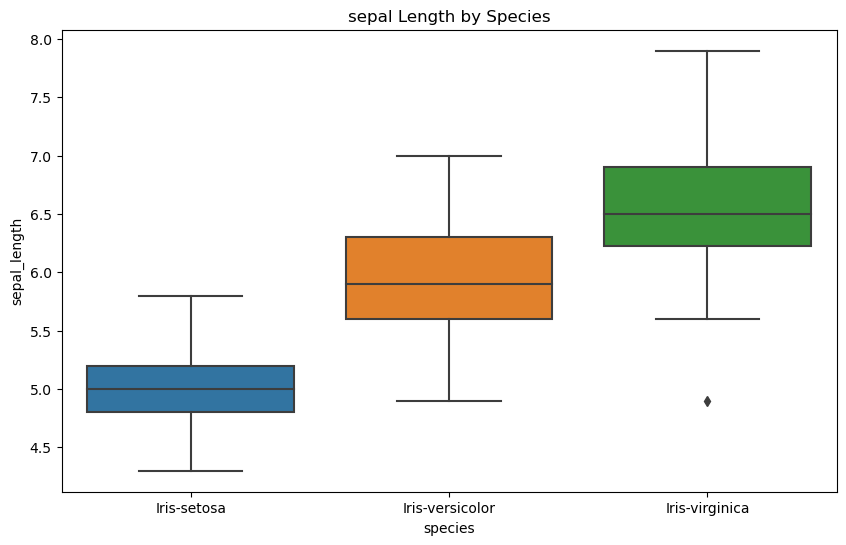

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('sepal Length by Species')
plt.show()

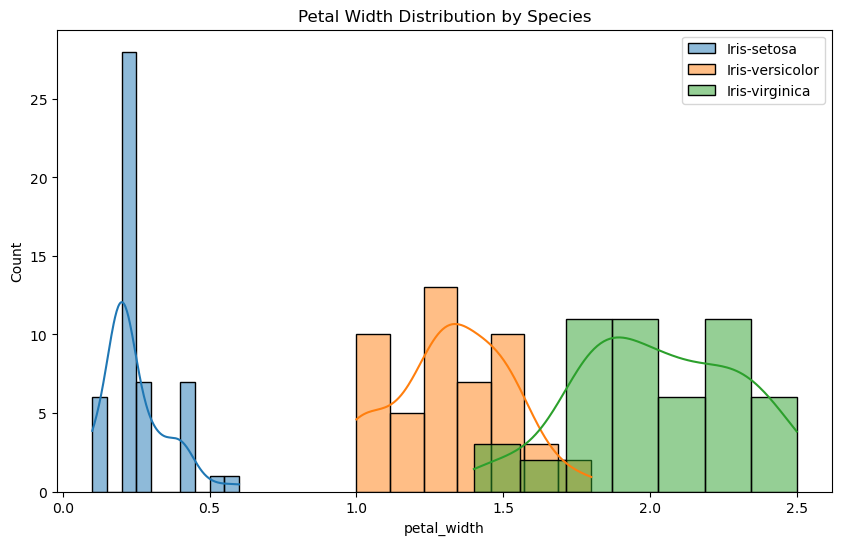

In [14]:
plt.figure(figsize=(10,6))
for species in df['species'].unique():
    sns.histplot(df[df['species']==species]['petal_width'], kde=True, label=species)
plt.title('Petal Width Distribution by Species')
plt.legend()
plt.show()

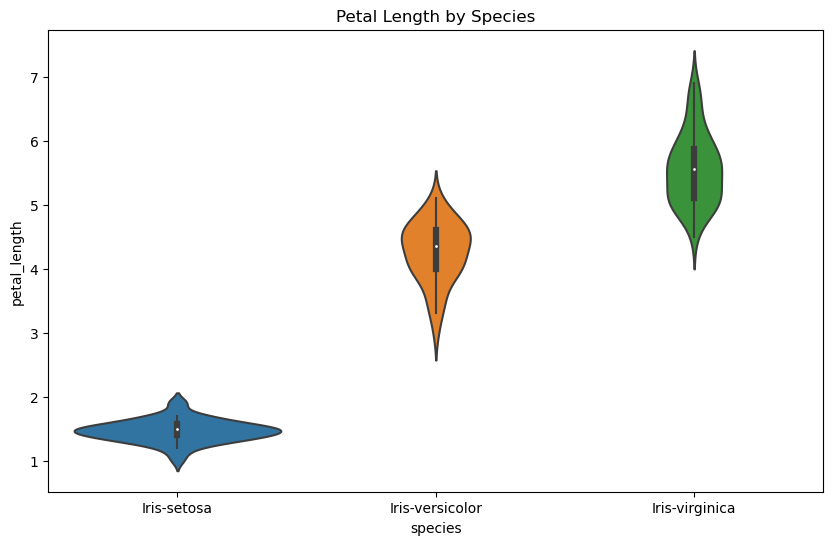

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='species', y='petal_length')
plt.title('Petal Length by Species')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
x = df[['sepal_length', 'sepal_width','petal_length','petal_width']]
y = df['species']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
logistic_regression_predictions = logistic_regression.predict(x_test)
knn_predictions = knn.predict(x_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_predictions))
print("Precision:", precision_score(y_test, logistic_regression_predictions, average='weighted'))
print("Recall:", recall_score(y_test, knn_predictions, average='weighted'))
print("F1-score:", f1_score(y_test, knn_predictions, average='weighted'))

Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [24]:
print("\nK-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Precision:", precision_score(y_test, knn_predictions, average='weighted'))
print("Recall:", recall_score(y_test, knn_predictions, average='weighted'))
print("F1-score:", f1_score(y_test, knn_predictions, average='weighted'))


K-Nearest Neighbors (KNN):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


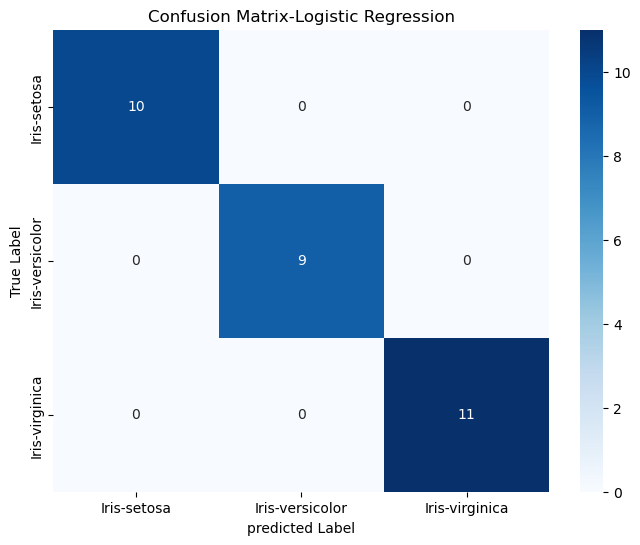

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, logistic_regression_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('Confusion Matrix-Logistic Regression')
plt.xlabel('predicted Label')
plt.ylabel('True Label')
plt.show()

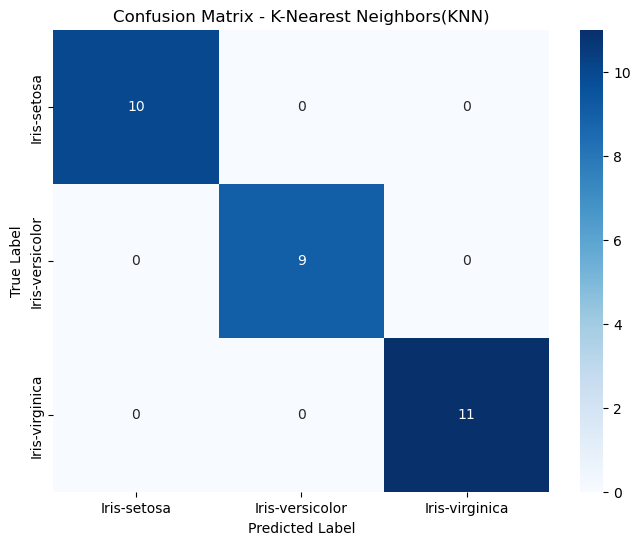

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('Confusion Matrix - K-Nearest Neighbors(KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
knn_param_grid = {'n_neighbors':[3,5,7,9,11]}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train, y_train)
print("Best Parameters for KNN:", knn_grid_search.best_params_)
knn_best = knn_grid_search.best_estimator_

Best Parameters for KNN: {'n_neighbors': 3}


In [30]:
new_data_predictions_lr = logistic_regression.predict(new_data_scaled)
new_data_predictions_knn = knn_best.predict(new_data_scaled)

NameError: name 'new_data_scaled' is not defined